In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm

In [4]:
# Definamos el sistema usando una lista
G = np.array([lambda x,y,z: 3*x - np.cos(y*z) - 1.5,
     lambda x,y,z: 4*x**2 - 625*y**2 + 2*y -1,
     lambda x,y,z: np.exp(-x*y) + 20*z + 9.471975])

In [5]:
def GetVectorF(G,r):
    
    dim = len(G)
    
    v = np.zeros(dim)
    
    for i in range(dim):
        v[i] = G[i](r[0],r[1],r[2])
        
    return v

In [6]:
def GetJacobian(G,r,h=0.001):
    
    dim = len(G)
    
    J = np.zeros( (dim,dim) )
    
    
    for i in range(dim):
        
        J[i,0] = (G[i](r[0]+h,r[1],r[2]) - G[i](r[0]-h,r[1],r[2]) )/(2*h)  
        J[i,1] = (G[i](r[0],r[1]+h,r[2]) - G[i](r[0],r[1]-h,r[2]) )/(2*h)  
        J[i,2] = (G[i](r[0],r[1],r[2]+h) - G[i](r[0],r[1],r[2]-h) )/(2*h)
        
    return J.T

In [12]:
def NewtonRaphson(G,r,error=1e-10,itmax=1000):
    
    it = 0
    d = 1
    dvector = []
    
    while d > error and it < itmax:
        
        it += 1
        # Valor actual
        rc = r # Valor inicial
        
        F = GetVectorF(G,r)
        J = GetJacobian(G,r)
        InvJ = np.linalg.inv(J)
        
        r = rc - np.dot(InvJ,F)
        
        d = np.linalg.norm(r-rc)
        
        dvector.append(d)
        
    return r,it,dvector

In [13]:
r = np.zeros(len(G))
r,it,distancias = NewtonRaphson(G,r)

In [14]:
print(r,it)

[ 0.83319658  0.05494366 -0.52136141] 38


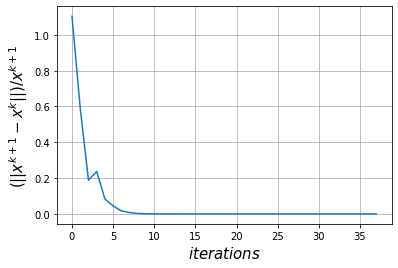

In [16]:
plt.plot(distancias)
#plt.yscale('log')
plt.xlabel(r'$iterations$', fontsize=15)
plt.ylabel(r'$(|| x^{k+1} - x^{k} ||)/x^{k+1} $', fontsize=15)
plt.grid()